<a href="https://colab.research.google.com/github/hariharanrl/hariharanrl.github.io/blob/master/Project_AugData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Location for Data

In [0]:
#!pip3 install tensorflow==1.12.0 
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import os
os.chdir('/content/drive/My Drive/NITK/Deep Learning Course 2020/classification data/Aug_PCB')
os.getcwd()

'/content/drive/My Drive/NITK/Deep Learning Course 2020/classification data/Aug_PCB'

Loading Training and Testing Data

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
x= np.load("s_x_train.npy")
y= np.load("s_y_train.npy")
print(x.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5040, 300, 300, 3)
(5040,)
(4032, 300, 300, 3) (4032,)
(1008, 300, 300, 3) (1008,)


Data Normalization

In [0]:
import keras
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train=keras.utils.normalize(X_train, axis=-1, order=2)
X_test=keras.utils.normalize(X_test, axis=-1, order=2)
print(np.max(X_train),np.max(X_test))
print(np.min(X_train),np.min(X_test))


Using TensorFlow backend.


1.0 1.0
0.0 0.0


Categorizing the Labels

In [0]:
#X_train = X_train.reshape(X_train.shape[1]*X_train.shape[2],300,300,3)
#X_test =  X_test.reshape(X_test.shape[0],300,300,1)
#print(X_train.shape)
#print(y_test.shape)
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]
print(y_train.shape)
print(y_test.shape)
print(num_classes)



(4032, 2)
(1008, 2)
2


In [0]:
def proj_model():
  #import tensorflow as tf
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import Dropout
  from keras.layers import Flatten
  from keras.constraints import maxnorm
  from keras.optimizers import SGD
  from keras.layers.convolutional import Conv2D
  from keras.layers import BatchNormalization
  from keras.layers.convolutional import MaxPooling2D
  from keras.utils import np_utils

  model=Sequential()
          
  model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
  model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.5))
  model.add(Flatten())
    
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(512, activation='relu'))
    
  model.add(Dense(num_classes, activation='softmax'))
    
  lrate = 0.01
  epochs=25
  decay = lrate/epochs
  sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
  return model


In [0]:
model=proj_model()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0        

In [0]:
import os
os.chdir("/content/drive/My Drive/NITK")
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
mc = ModelCheckpoint('ProjectAug.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/drive/My Drive/NITK/logs2', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('ProjectAug.csv',append=True)

In [0]:
histoy=model.fit(X_train, y_train, validation_split=(0.2), epochs=25, batch_size=32,verbose=2,callbacks=[cv,mc,tb])
#histoy=model.fit(X_train,y_train,validation_split=(0.2),epochs=30,batch_size=32,verbose=2)

Train on 3225 samples, validate on 807 samples
Epoch 1/25
 - 17s - loss: 0.6651 - acc: 0.5693 - val_loss: 0.6106 - val_acc: 0.6270

Epoch 2/25
 - 16s - loss: 0.5804 - acc: 0.6763 - val_loss: 0.5297 - val_acc: 0.7770
Epoch 3/25
 - 16s - loss: 0.4442 - acc: 0.8019 - val_loss: 0.3299 - val_acc: 0.8810
Epoch 4/25
 - 16s - loss: 0.3683 - acc: 0.8384 - val_loss: 0.5118 - val_acc: 0.7757
Epoch 5/25
 - 16s - loss: 0.2715 - acc: 0.8831 - val_loss: 0.2301 - val_acc: 0.8971
Epoch 6/25
 - 16s - loss: 0.1861 - acc: 0.9098 - val_loss: 0.2251 - val_acc: 0.9021
Epoch 7/25
 - 16s - loss: 0.1517 - acc: 0.9340 - val_loss: 0.1512 - val_acc: 0.9244
Epoch 8/25
 - 16s - loss: 0.1250 - acc: 0.9442 - val_loss: 0.1529 - val_acc: 0.9430
Epoch 9/25
 - 16s - loss: 0.1020 - acc: 0.9550 - val_loss: 0.1058 - val_acc: 0.9591
Epoch 10/25
 - 16s - loss: 0.0802 - acc: 0.9668 - val_loss: 0.1920 - val_acc: 0.9430
Epoch 11/25
 - 16s - loss: 0.0702 - acc: 0.9767 - val_loss: 0.1902 - val_acc: 0.9442
Epoch 12/25
 - 16s - loss:

In [0]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)
print(test_loss)

1008/1008 [==============================] - 2s 2ms/step
0.9692460317460317
0.14722014679610435


In [0]:
train_loss = histoy.history['loss']
train_acc = histoy.history['acc']
val_loss = histoy.history['val_loss']
val_acc = histoy.history['val_acc']
xc=range(25)

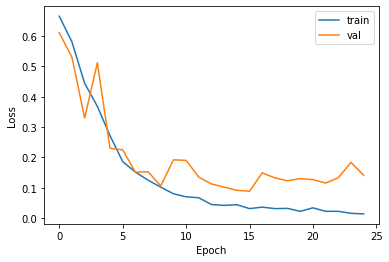

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [0]:
model.load_weights('ProjectAug.h5')
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)
print(test_loss)

1008/1008 [==============================] - 2s 2ms/step
0.9632936507936508
0.12098532647452509


In [0]:
i=11
print("Original is ",y_test[i])
pred=model.predict(X_test[i].reshape(1,300,300,3))
print("Predicted is ",pred)

Original is  [0. 1.]
Predicted is  [[2.8291654e-15 1.0000000e+00]]


In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target = ['Defective','Non-Defective']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target))
print(confusion_matrix(y_test,y_pred))

               precision    recall  f1-score   support

    Defective       0.94      0.99      0.97       525
Non-Defective       0.99      0.94      0.96       483

     accuracy                           0.96      1008
    macro avg       0.97      0.96      0.96      1008
 weighted avg       0.96      0.96      0.96      1008



In [0]:
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

[[519   6]
 [ 31 452]]
